In [29]:
import json
import yaml
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

sys.path.insert(1, '../../Databank/Scripts/BuildDatabank/')
from databankLibrary import download_link, read_mapping_file, read_mapping_file_res, read_mapping_filePAIR, make_positive_angles, lipids_dict, molecules_dict, databank

path = '../../Databank/Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()


def CalcAreaPerMolecule(system):
    path = system['path']
    APLpath = path.replace('../Data/MD-PERMEATION/', '../../Databank/Data/Simulations/')
    APLpath = APLpath + 'apl.json'
    #try:
    f = open(APLpath)
    APLdata = json.load(f)
    sumAPL = 0
    sumIND = 0
    for i,j in APLdata.items():
        sumAPL += j
        sumIND += 1
    APL = sumAPL/sumIND
    return(APL)

def plotFormFactor(expFormFactor,k,legend,PlotColor):
    xValues = []
    yValues = []
    for i in expFormFactor:
        xValues.append(i[0])
        yValues.append(k*i[1])
    plt.plot(xValues,yValues,label = legend,color=PlotColor,linewidth=4.0)
    plt.xlabel(r'$q_{z} [Å^{-1}]$',size=20)
    plt.ylabel(r'$|F(q_{z})|$',size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.xlim([0,0.69])
    plt.ylim([-10,250])
    plt.legend(loc="upper right")
    plt.savefig('FormFactor.pdf')


def plotOrderParameters(OPsim, OPexp):
    xValuesHG = []
    xValuesSN1 = []
    xValuesSN2 = []
    
    yValuesHGsim = []
    yValuesSN1sim = []
    yValuesSN2sim = []
    yValuesHGsimERR = []
    yValuesSN1simERR = []
    yValuesSN2simERR = []
    yValuesHGexp = []
    yValuesSN1exp = []
    yValuesSN2exp = []

    sn1carbons = {'M_G1C3_M M_G1C3H1_M' :2,
                  'M_G1C3_M M_G1C3H2_M' :2,
                  'M_G1C4_M M_G1C4H1_M' :3,
                  'M_G1C4_M M_G1C4H2_M' :3,
                  'M_G1C5_M M_G1C5H1_M' :4,
                  'M_G1C5_M M_G1C5H2_M' :4,
                  'M_G1C6_M M_G1C6H1_M' :5,
                  'M_G1C6_M M_G1C6H2_M' :5,
                  'M_G1C7_M M_G1C7H1_M' :6,
                  'M_G1C7_M M_G1C7H2_M' :6,
                  'M_G1C8_M M_G1C8H1_M' :7,
                  'M_G1C8_M M_G1C8H2_M' :7,
                  'M_G1C9_M M_G1C9H1_M' :8,
                  'M_G1C9_M M_G1C9H2_M' :8,
                  'M_G1C10_M M_G1C10H1_M' :9,
                  'M_G1C10_M M_G1C10H2_M' :9,
                  'M_G1C11_M M_G1C11H1_M' :10,
                  'M_G1C11_M M_G1C11H2_M' :10,
                  'M_G1C12_M M_G1C12H1_M' :11,
                  'M_G1C12_M M_G1C12H2_M' :11,
                  'M_G1C13_M M_G1C13H1_M' :12,
                  'M_G1C13_M M_G1C13H2_M' :12,
                  'M_G1C14_M M_G1C14H1_M' :13,
                  'M_G1C14_M M_G1C14H2_M' :13,
                  'M_G1C15_M M_G1C15H1_M' :14,
                  'M_G1C15_M M_G1C15H2_M' :14,
                  'M_G1C16_M M_G1C16H1_M' :15,
                  'M_G1C16_M M_G1C16H2_M' :15,
                  'M_G1C17_M M_G1C17H1_M' :16,
                  'M_G1C17_M M_G1C17H2_M' :16,
                  'M_G1C17_M M_G1C17H3_M' :16,
                  'M_G1C18_M M_G1C18H1_M' :17,
                  'M_G1C18_M M_G1C18H2_M' :17,
                  'M_G1C18_M M_G1C18H3_M' :17,
                  'M_G1C19_M M_G1C19H1_M' :18,
                  'M_G1C19_M M_G1C19H2_M' :18,
                  'M_G1C19_M M_G1C19H3_M' :18,
              
                 }
    
    sn2carbons = {'M_G2C3_M M_G2C3H1_M' :2,
                  'M_G2C3_M M_G2C3H2_M' :2,
                  'M_G2C4_M M_G2C4H1_M' :3,
                  'M_G2C4_M M_G2C4H2_M' :3,
                  'M_G2C5_M M_G2C5H1_M' :4,
                  'M_G2C5_M M_G2C5H2_M' :4,
                  'M_G2C6_M M_G2C6H1_M' :5,
                  'M_G2C6_M M_G2C6H2_M' :5,
                  'M_G2C7_M M_G2C7H1_M' :6,
                  'M_G2C7_M M_G2C7H2_M' :6,
                  'M_G2C8_M M_G2C8H1_M' :7,
                  'M_G2C8_M M_G2C8H2_M' :7,
                  'M_G2C9_M M_G2C9H1_M' :8,
                  'M_G2C9_M M_G2C9H2_M' :8,
                  'M_G2C10_M M_G2C10H1_M' :9,
                  'M_G2C10_M M_G2C10H2_M' :9,
                  'M_G2C11_M M_G2C11H1_M' :10,
                  'M_G2C11_M M_G2C11H2_M' :10,
                  'M_G2C12_M M_G2C12H1_M' :11,
                  'M_G2C12_M M_G2C12H2_M' :11,
                  'M_G2C13_M M_G2C13H1_M' :12,
                  'M_G2C13_M M_G2C13H2_M' :12,
                  'M_G2C14_M M_G2C14H1_M' :13,
                  'M_G2C14_M M_G2C14H2_M' :13,
                  'M_G2C15_M M_G2C15H1_M' :14,
                  'M_G2C15_M M_G2C15H2_M' :14,
                  'M_G2C16_M M_G2C16H1_M' :15,
                  'M_G2C16_M M_G2C16H2_M' :15,
                  'M_G2C17_M M_G2C17H1_M' :16,
                  'M_G2C17_M M_G2C17H2_M' :16,
                  'M_G2C17_M M_G2C17H3_M' :16,
                  'M_G2C18_M M_G2C18H1_M' :17,
                  'M_G2C18_M M_G2C18H2_M' :17,
                  'M_G2C18_M M_G2C18H3_M' :17,
                  'M_G2C19_M M_G2C19H1_M' :18,
                  'M_G2C19_M M_G2C19H2_M' :18,
                  'M_G2C19_M M_G2C19H3_M' :18,
                 }
    
    
    HGcarbons = {'M_G3N6C1_M M_G3N6C1H1_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H2_M' : 1,
                 'M_G3N6C1_M M_G3N6C1H3_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H1_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H2_M' : 1,
                 'M_G3N6C2_M M_G3N6C2H3_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H1_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H2_M' : 1,
                 'M_G3N6C3_M M_G3N6C3H3_M' : 1,
                 'M_G3C5_M M_G3C5H1_M' : 2,
                 'M_G3C5_M M_G3C5H2_M' : 2,
                 'M_G3C4_M M_G3C4H1_M' : 3,
                 'M_G3C4_M M_G3C4H2_M' : 3,
                 'M_G3_M M_G3H1_M' : 4,
                 'M_G3_M M_G3H2_M' : 4,
                 'M_G2_M M_G2H1_M' : 5,
                 'M_G1_M M_G1H1_M' : 6,
                 'M_G1_M M_G1H2_M' : 6,
                 }
    
    
    for key in OPsim:
        if 'M_G1C' in key:
            xValuesSN1.append(sn1carbons[key])
            yValuesSN1sim.append(float(OPsim[key][0][0]))
            yValuesSN1simERR.append(float(OPsim[key][0][2]))
            yValuesSN1exp.append(OPexp[key][0][0])
        elif 'M_G2C' in key:
            xValuesSN2.append(sn2carbons[key])
            yValuesSN2sim.append(float(OPsim[key][0][0]))
            yValuesSN2simERR.append(float(OPsim[key][0][2]))
            yValuesSN2exp.append(OPexp[key][0][0])
        elif 'M_G3' in key or 'M_G2_M' in key or 'M_G1_M' in key:
            xValuesHG.append(HGcarbons[key])
            yValuesHGsim.append(float(OPsim[key][0][0]))
            yValuesHGsimERR.append(float(OPsim[key][0][2]))
            yValuesHGexp.append(OPexp[key][0][0])
    #print(xValues,yValues)
    plt.rc('font', size=15)
    #plt.plot(xValuesHG,yValuesHGsim,'.',color='red',markersize=15)
    plt.errorbar(xValuesHG,yValuesHGexp, yerr = 0.02,fmt='.',color='black',markersize=25)
    plt.errorbar(xValuesHG,yValuesHGsim, yerr = yValuesHGsimERR,fmt='.',color='red',markersize=20)
    #plt.plot(xValuesHG,yValuesHGexp,'.',color='black',markersize=15)
    my_xticks = ['\u03B3','\u03B2','\u03B1','$g_{1}$','$g_{2}$','$g_{3}$']
    plt.xticks([1,2,3,4,5,6], my_xticks,size=20)
    #plt.xlabel('Carbon')
    plt.ylim([-0.3,0.35])
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.savefig('HG.pdf')
    plt.show()
    
    plt.text(3, -0.04, 'sn-1', fontsize=25)
    plt.xticks(np.arange(min(xValuesSN1), max(xValuesSN1)+1, 2.0))
    plt.plot(xValuesSN1,yValuesSN1sim,color='red')
    plt.plot(xValuesSN1,yValuesSN1exp,color='black')
    plt.errorbar(xValuesSN1,yValuesSN1sim, yerr = yValuesSN1simERR,fmt='.',color='red',markersize=25)
    plt.errorbar(xValuesSN1,yValuesSN1exp, yerr = 0.02, fmt='.',color='black',markersize=20)
    #plt.xlabel('Carbon')
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylim([-0.3,0.01])
    plt.savefig('sn-1.pdf')
    plt.show()
    
    plt.text(3, 0.1, 'sn-2', fontsize=25)
    plt.xticks(np.arange(min(xValuesSN2), max(xValuesSN2)+1, 2.0))
    plt.plot(xValuesSN2,yValuesSN2sim,color='red')
    plt.plot(xValuesSN2,yValuesSN2exp,color='black')
    plt.errorbar(xValuesSN2,yValuesSN2sim,yValuesSN2simERR,fmt='.',color='red',markersize=25)
    plt.errorbar(xValuesSN2,yValuesSN2exp, yerr = 0.02, fmt='.',color='black',markersize=20)
    plt.xlabel('Carbon',size=25)
    plt.ylabel(r'$S_{CH}$',size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    #plt.yticks(color = 'w')
    plt.ylim([-0.25,0.15])
    plt.savefig('sn-2.pdf')
    plt.show()


def plotSimulation(ID, lipid):
    DataBankPath = '../../Databank/Data/'
    for system in systems:
        #print(system)
        if system['ID'] == ID:
             path = DataBankPath + system['path']
    #lipid = 'POPC'
    FFpathSIM = path + 'FormFactor.json'
    OPpathSIM = path + lipid + 'OrderParameters.json'
    READMEfilepath = path + '/README.yaml'
    FFQualityFilePath = path + '/FormFactorQuality.json'

    
    with open(READMEfilepath) as yaml_file:
        readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
   
    print('DOI: ', readme['DOI'])
    
    try:
        with open(FFQualityFilePath) as json_file:
            FFq = json.load(json_file)
        print('Form factor quality: ', FFq[0])
        for subdir, dirs, files in os.walk(DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/'):
            for filename in files:
                #filepath = '../../Data/experiments/FormFactors/' + expFFpath + '/' + filename
                if filename.endswith('_FormFactor.json'):
                    FFpathEXP = subdir + filename
        #FFpathEXP =  DataBankPath + 'experiments/FormFactors/' + readme['EXPERIMENT']['FORMFACTOR'] + '/POPS_ULV_25Cin0D_SHE_FormFactor.json'
        with open(FFpathEXP) as json_file:
            FFexp = json.load(json_file)
    
    except:
        print('Force field quality not found')
    
    
    with open(OPpathSIM) as json_file:
        OPsim = json.load(json_file)

    OPexp = {}
    for expOPfolder in list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values()):
        #expOPfolder = list(readme['EXPERIMENT']['ORDERPARAMETER'][lipid].values())[0]
        OPpathEXP =  DataBankPath + 'experiments/OrderParameters/' + expOPfolder + '/' + lipid + '_Order_Parameters.json'
        #print(OPpathEXP)
        with open(OPpathEXP) as json_file:
            OPexp.update(json.load(json_file))
    #print(OPexp)

    try:
        with open(FFpathSIM) as json_file:
            FFsim = json.load(json_file)
        plotFormFactor(FFsim,1, 'Simulation','red')
        plotFormFactor(FFexp,FFq[1], 'Experiment','black')
    except:
        print('Form factor plotting failed')
    
    plt.show()
    plotOrderParameters(OPsim, OPexp)
    #print(OPsim)
    #print(OPexp)

# CHARMM-Drude POPC

APL:  62.46346358926781
DOI:  10.5281/zenodo.7607436
Form factor quality:  0.9220000000000006


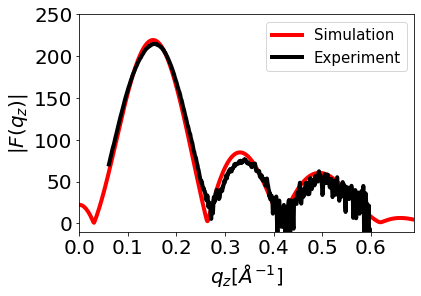

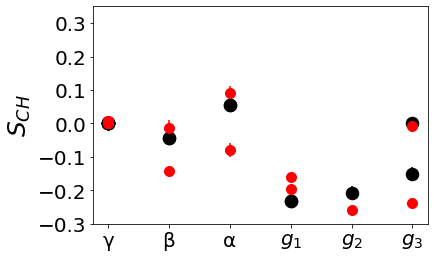

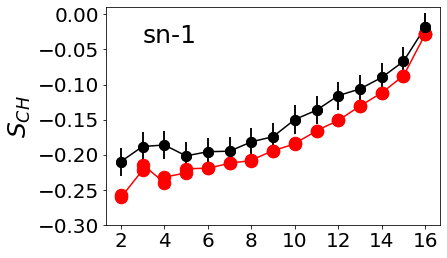

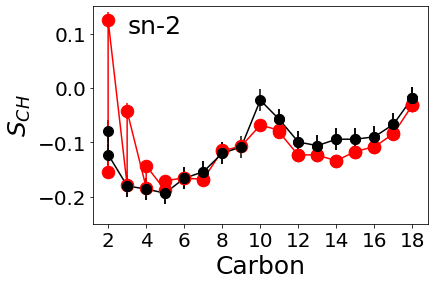

In [5]:
ID = 734

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))

plotSimulation(ID, 'POPC')

# CHARMM-Drude POPE

APL:  56.61397009422649
DOI:  10.5281/zenodo.7602770
Form factor quality:  0.7999999999999952


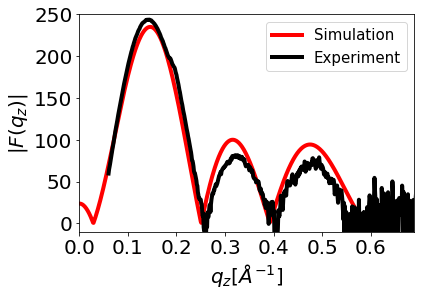

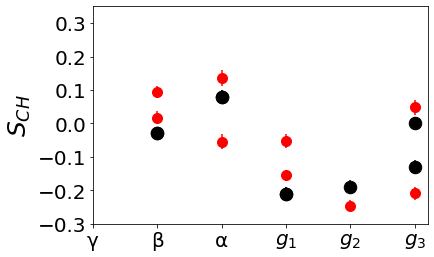

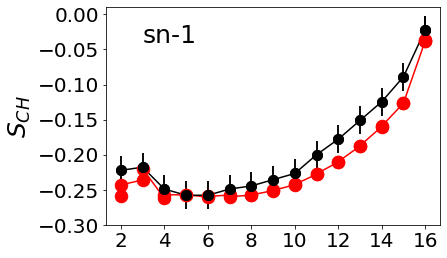

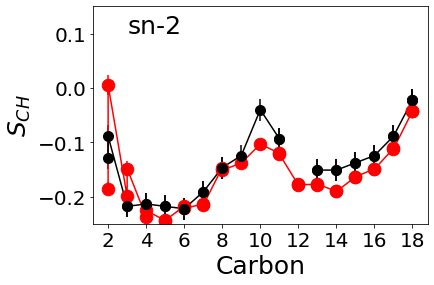

In [6]:
ID = 731

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))

plotSimulation(ID, 'POPE')

# AMOEBA DOPC

APL:  69.96363196801884
DOI:  10.5281/zenodo.7604681
Force field quality not found
Form factor plotting failed


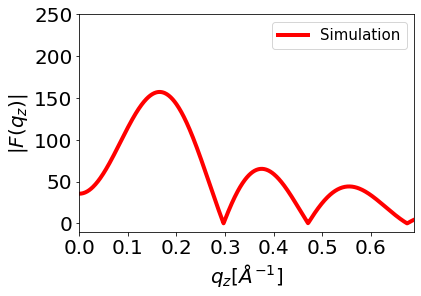

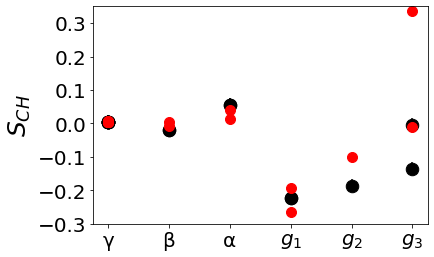

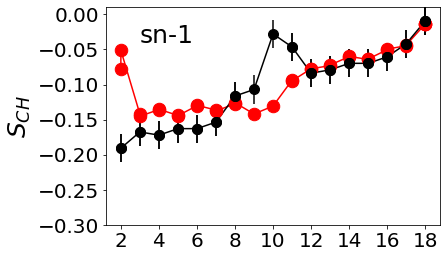

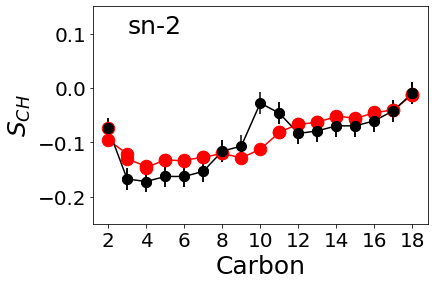

In [8]:
ID = 742

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
        
plotSimulation(ID, 'DOPC')

# AMOEBA POPE

APL:  66.93422002062475
DOI:  10.5281/zenodo.7602924
Form factor quality:  3.799999999999998


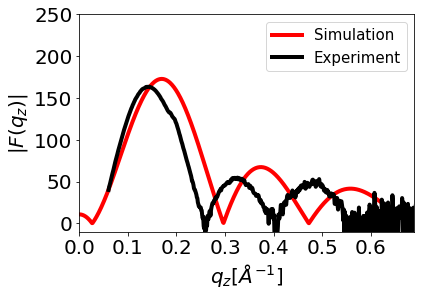

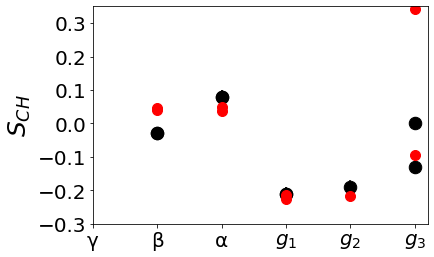

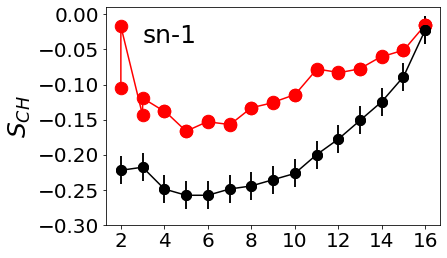

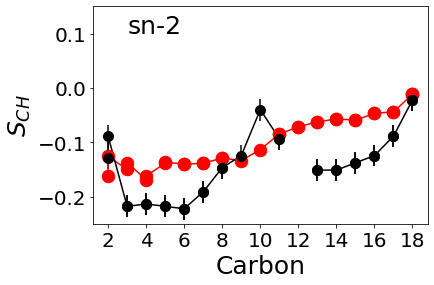

In [9]:
ID = 730

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPE')

# POPC CHARMM DRUDE2023 (3 replicas)

APL:  65.7113321109348
DOI:  10.5281/zenodo.7916287
Form factor quality:  0.42200000000000015


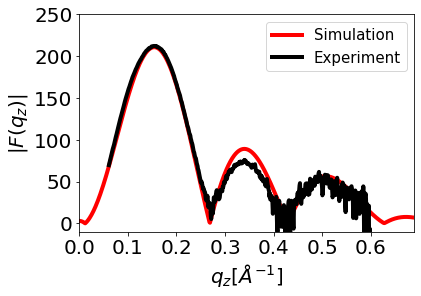

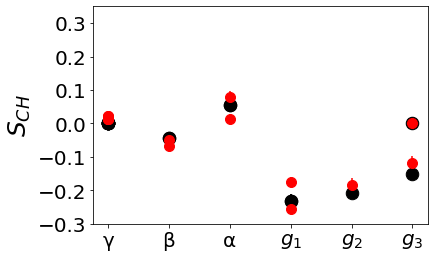

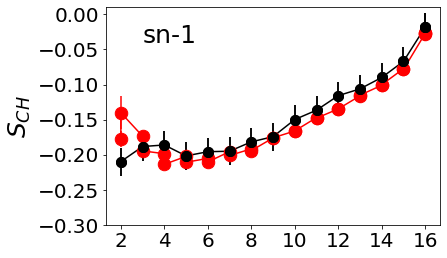

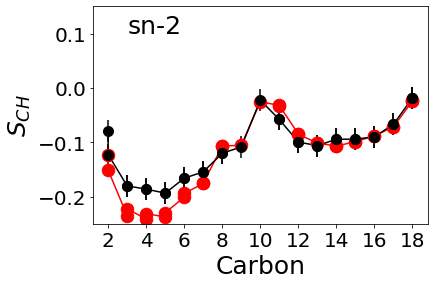

In [20]:
ID = 748

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPC')

APL:  64.72575451354969
DOI:  10.5281/zenodo.7916287
Form factor quality:  0.8220000000000005


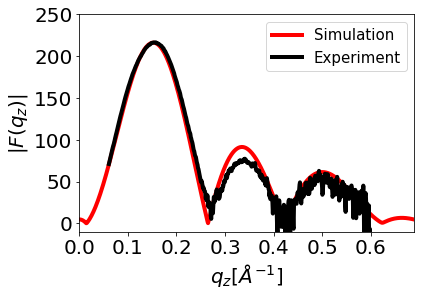

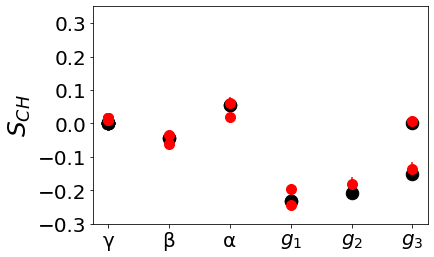

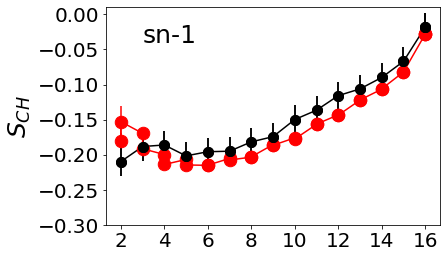

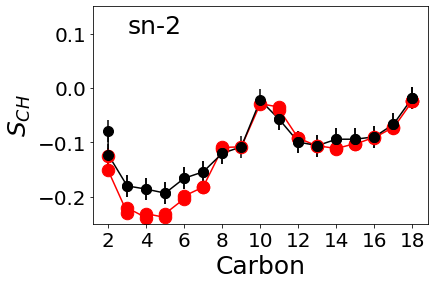

In [19]:
ID = 752

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPC')

APL:  64.58311660088422
DOI:  10.5281/zenodo.7916287
Form factor quality:  0.8220000000000005


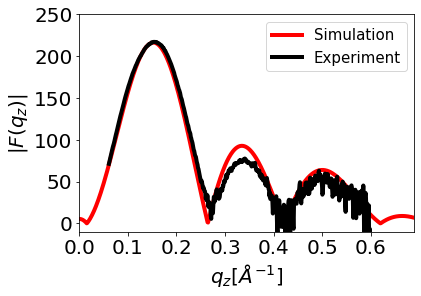

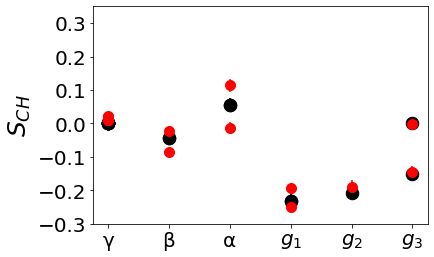

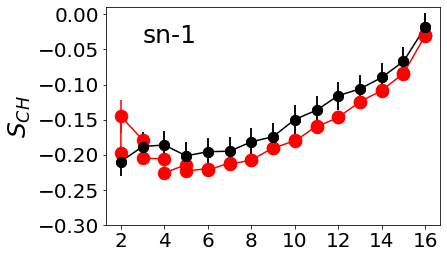

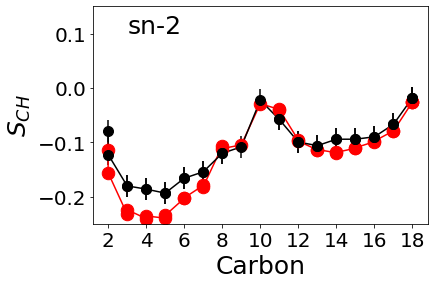

In [31]:
ID = 749

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPC')

# POPE CHARMM DRUDE2023

APL:  60.98529969634998
DOI:  10.5281/zenodo.7916494
Form factor quality:  0.20000000000000018


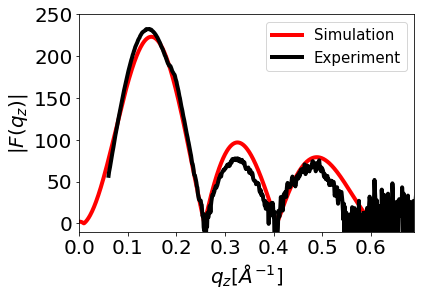

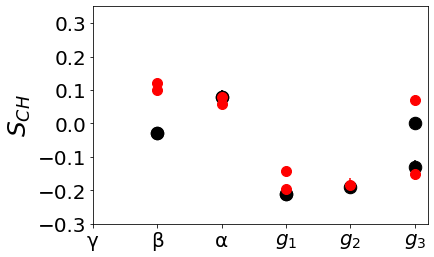

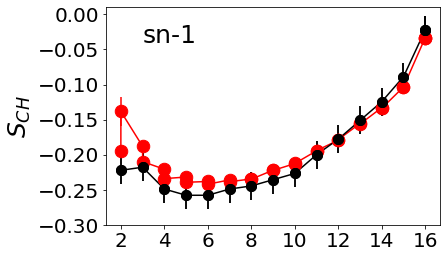

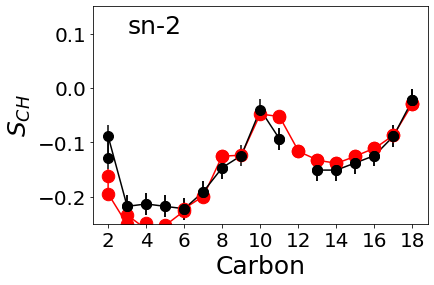

In [22]:
ID = 750

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPE')

APL:  61.41394220004586
DOI:  10.5281/zenodo.7916494
Form factor quality:  0.0


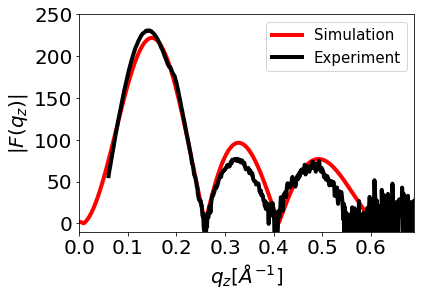

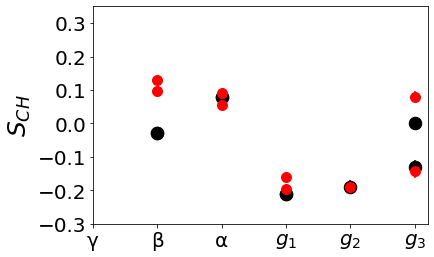

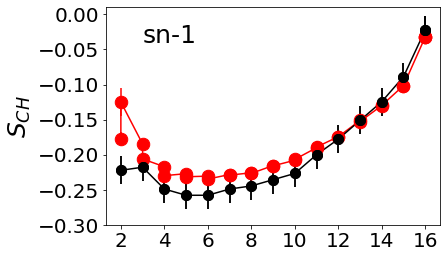

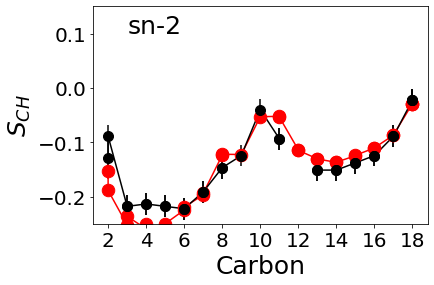

In [32]:
ID = 751

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPE')

APL:  60.75644564175066
DOI:  10.5281/zenodo.7916494
Form factor quality:  0.30000000000000027


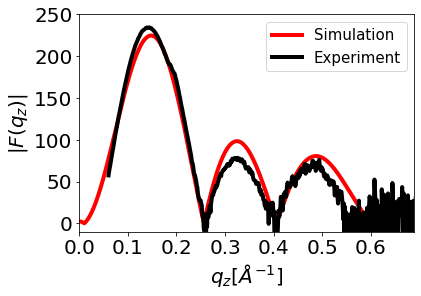

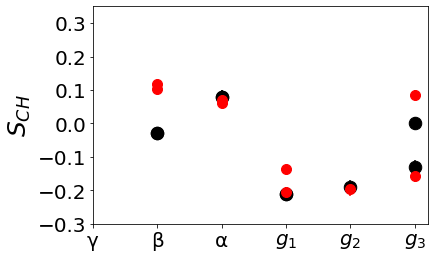

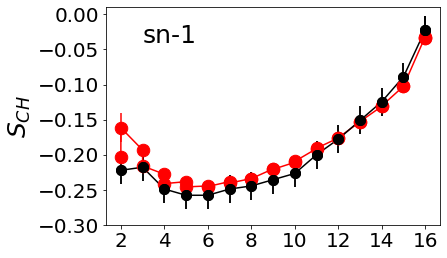

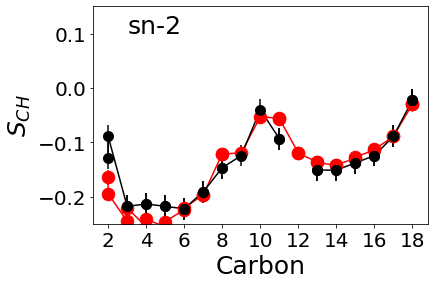

In [30]:
ID = 747

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    
plotSimulation(ID, 'POPE')

# Berger DOPC

APL:  69.86226227401436
DOI:  10.5281/zenodo.1402411
Force field quality not found
Form factor plotting failed


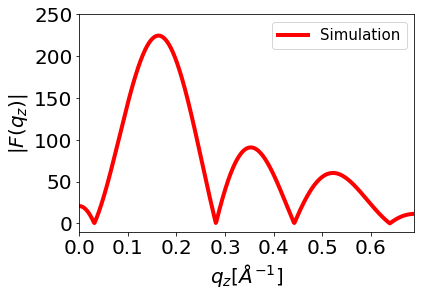

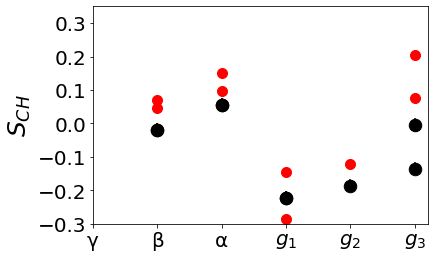

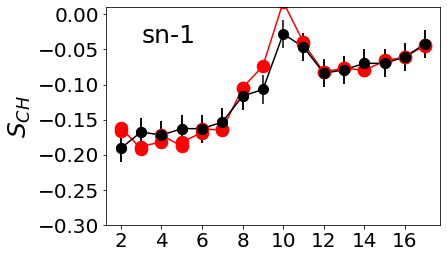

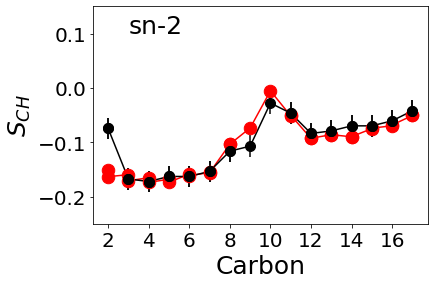

In [60]:
ID = 330

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
        
plotSimulation(ID, 'DOPC')

# CHARMM36 POPC (T= 303K)

APL:  64.95895958576139
DOI:  10.5281/zenodo.164206
Form factor quality:  1.0220000000000007


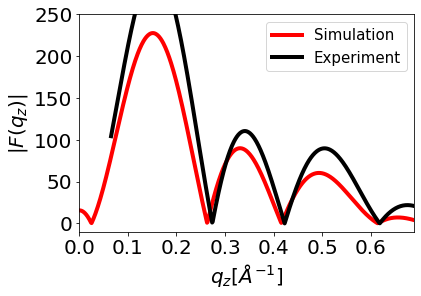

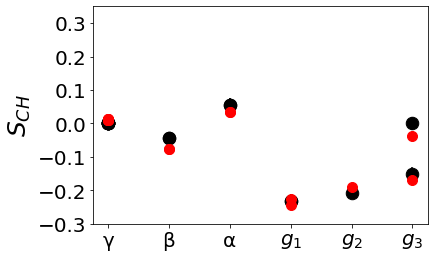

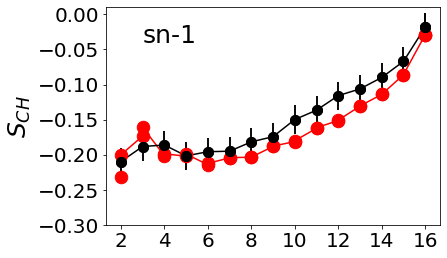

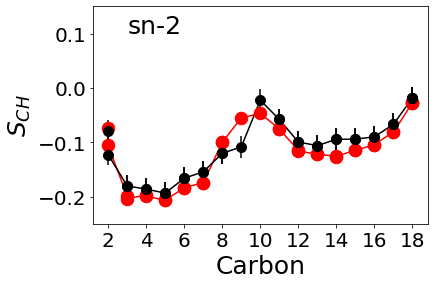

In [67]:
ID = 462

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
        
plotSimulation(ID, 'POPC')

# Overall best simulation OPLS3 POPC (10.5281/zenodo.6582985)

APL:  66.5701704726429
DOI:  10.5281/zenodo.6582985
Form factor quality:  0.15499999999999958


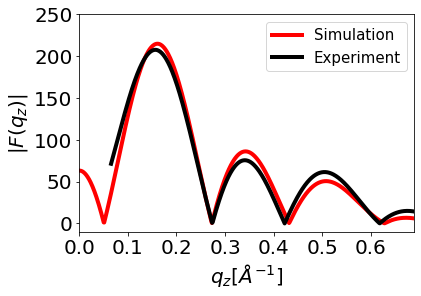

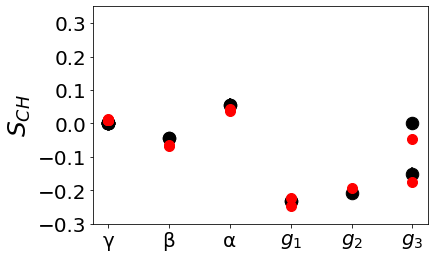

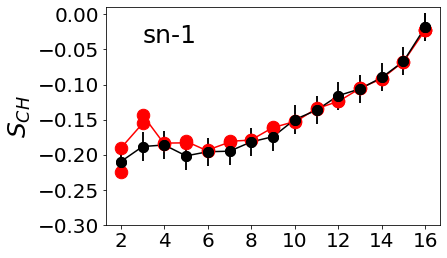

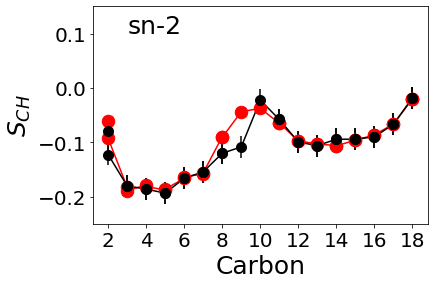

In [65]:
ID = 1

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
        
plotSimulation(1, 'POPC')

# Overall second best simulation Slipids POPC (10.5281/zenodo.166034)

DOI:  10.5281/zenodo.166034
Form factor quality:  0.45499999999999985


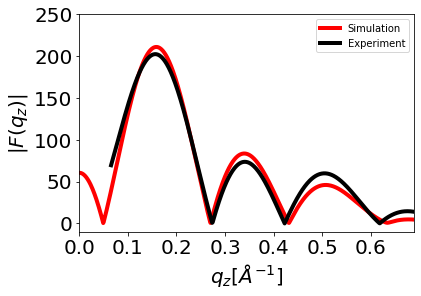

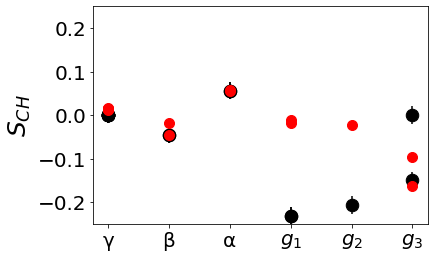

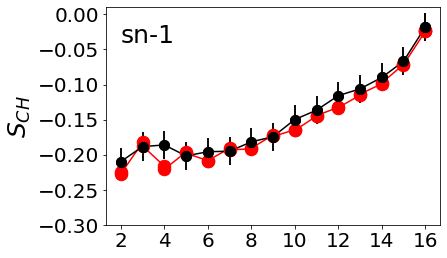

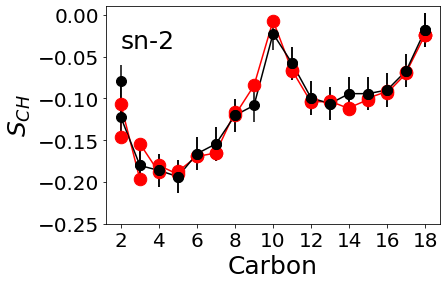

In [6]:
plotSimulation(617, 'POPC')

# Second best quality for acyl chains POPC Berger (10.5281/zenodo.1402417)

Form factor quality:  1.7788673840396396
DOI:  10.5281/zenodo.1402417


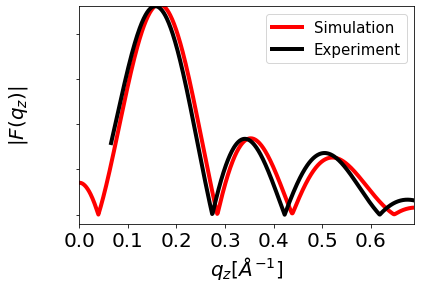

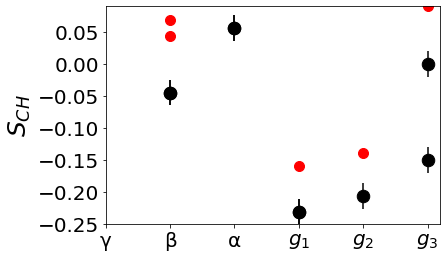

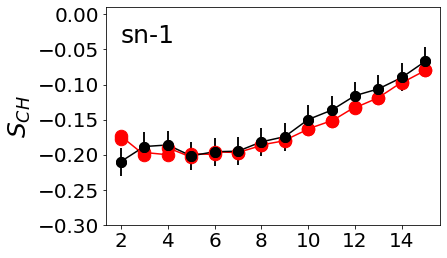

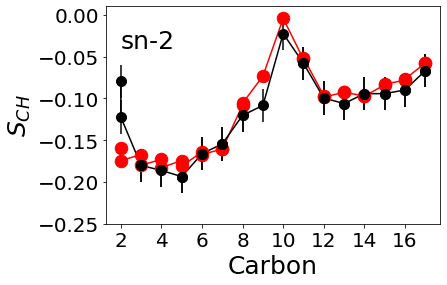

In [24]:
plotSimulation(115,'POPC')

# Second Best quality for headgroup from CHARMM36 POPC (10.5281/zenodo.5767451)

DOI:  10.5281/zenodo.5767451
Form factor quality:  1.1354999999999948


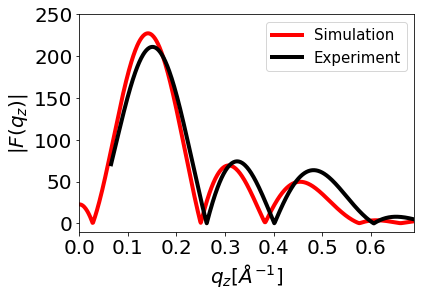

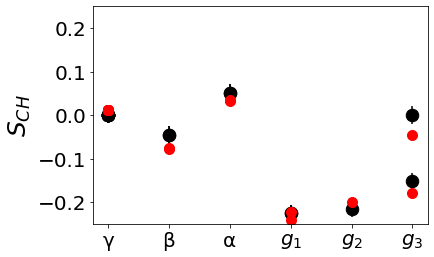

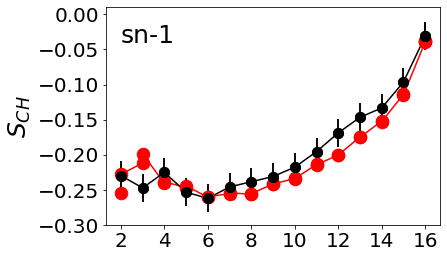

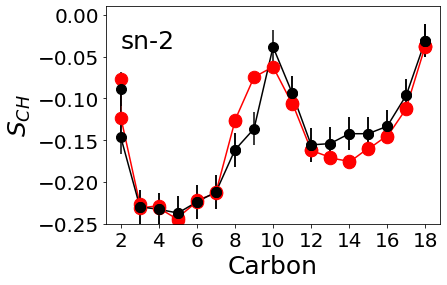

In [8]:
plotSimulation(426,'POPC')

# Best quality for form factor in Lipid14 POPC (10.5281/zenodo.3231342)

DOI:  10.5281/zenodo.12767
Form factor quality:  0.021999999999999797


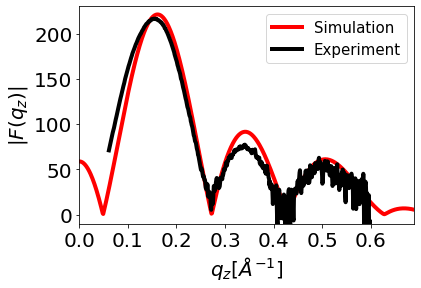

KeyError: 'M_G1_M M_G1H1_M'

In [8]:
plotSimulation(154,'POPC')

# Third best quality in MacRog POPC

Form factor quality:  0.545000000000001
DOI:  10.5281/zenodo.3741793


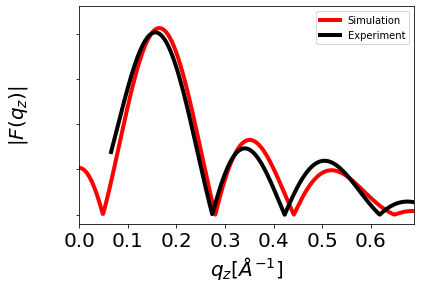

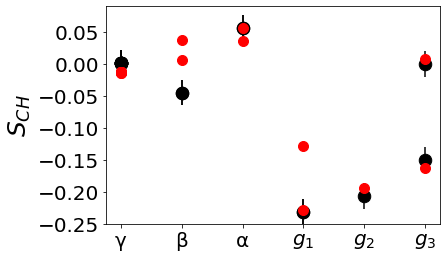

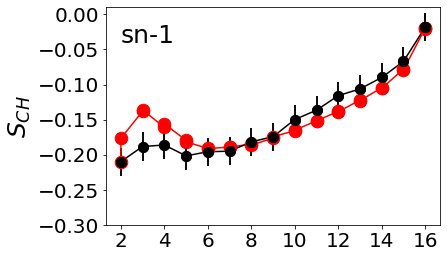

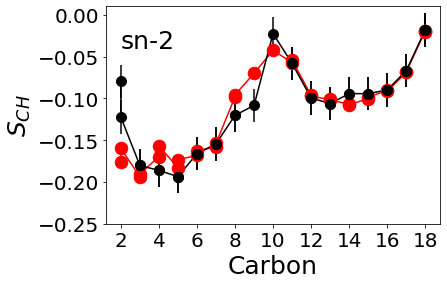

In [5]:
# 10.5281/zenodo.13498
plotSimulation(457, 'POPC')

# Best quality for POPS in ECClipids

DOI:  10.5281/zenodo.1488094
Form factor quality:  0.40000000000000036


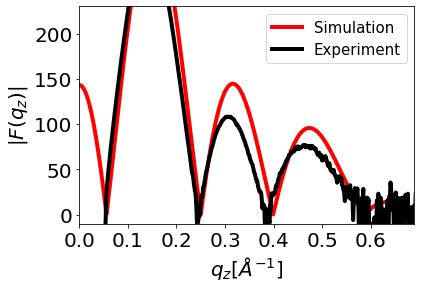

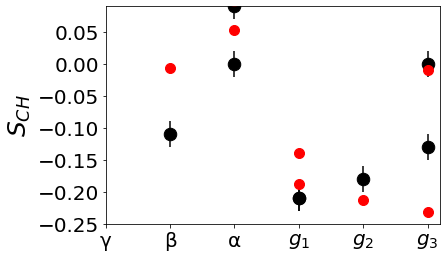

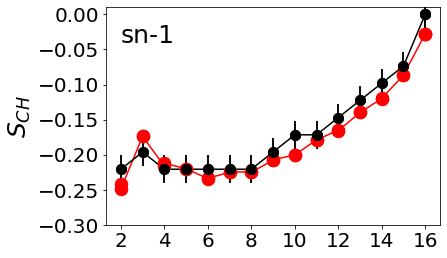

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


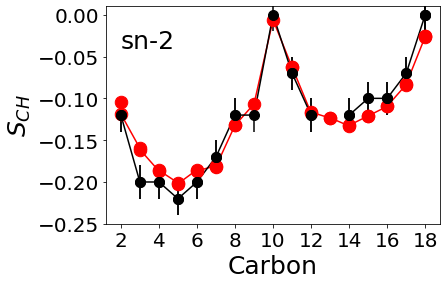

In [9]:
plotSimulation(443, 'POPS')

# Best quality for POPE in GROMOS-CKP

APL:  59.647642959141244
DOI:  10.5281/zenodo.3237754
Form factor quality:  0.40000000000000036


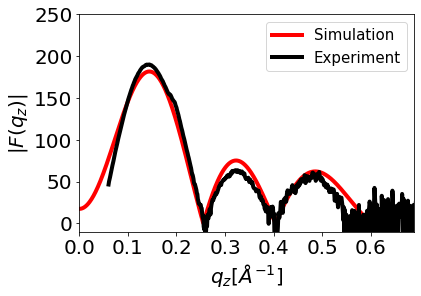

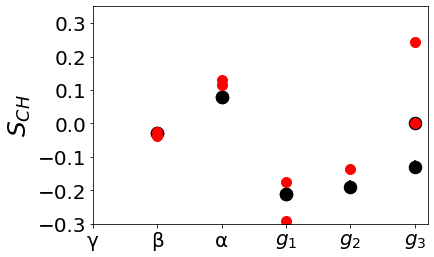

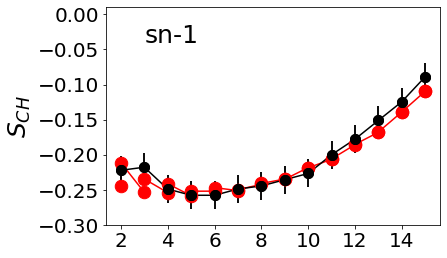

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


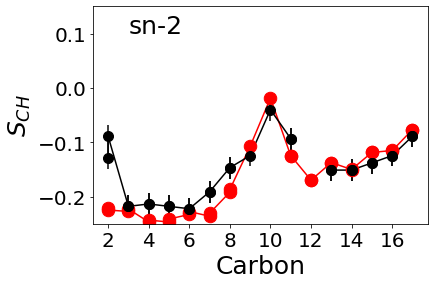

In [68]:
ID = 400

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    

plotSimulation(400,'POPE')

# Best headgroup quality for POPE in CHARMM36

APL:  57.177166603704364
DOI:  10.5281/zenodo.2641987
Form factor quality:  1.2999999999999985


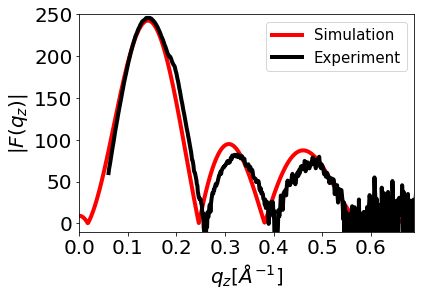

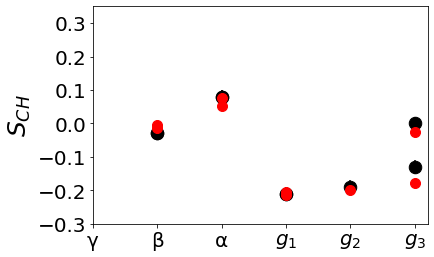

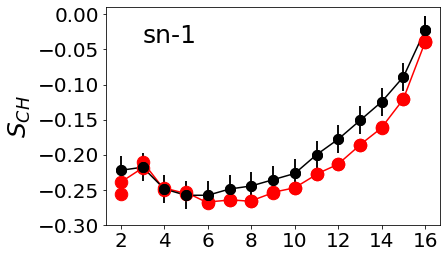

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


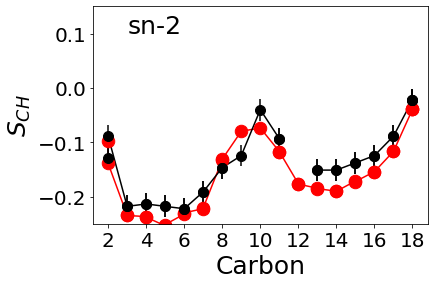

In [69]:
ID = 430

for system in systems:
    if system['ID'] == ID:
        print('APL: ', CalcAreaPerMolecule(system))
    

plotSimulation(430,'POPE')

# Worst quality for POPE in Lipid17

DOI:  10.5281/zenodo.4424292
Form factor quality:  1.5999999999999988


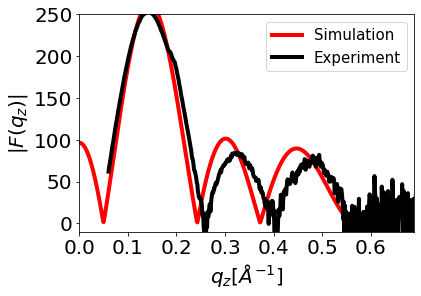

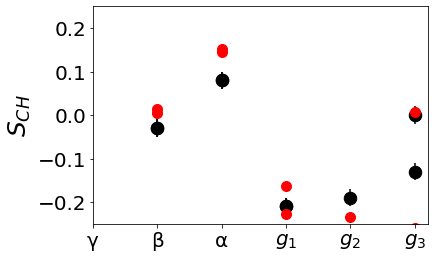

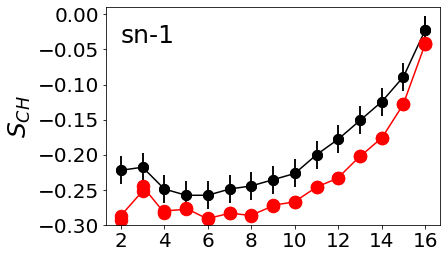

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


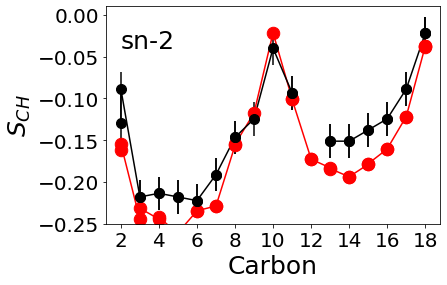

In [16]:
plotSimulation(195,'POPE')

# Lipid14 POPC

DOI:  10.5281/zenodo.30898
Form factor quality:  0.8550000000000002


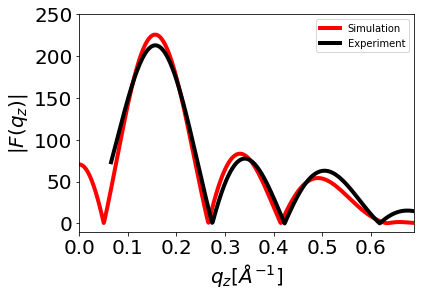

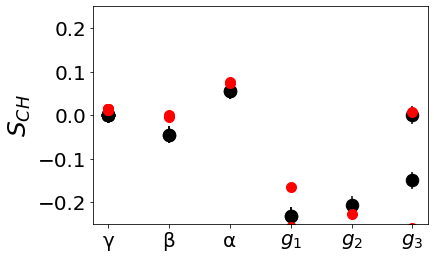

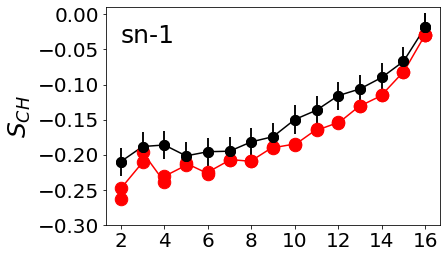

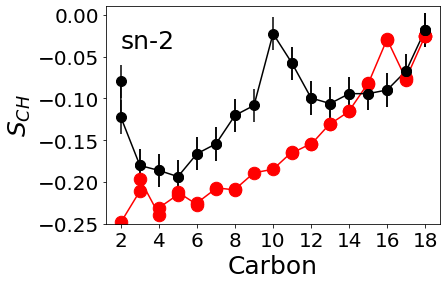

In [5]:
plotSimulation(30,'POPC')

# GROMOS-CKP POPC

DOI:  10.5281/zenodo.5997385
Form factor quality:  1.3550000000000006


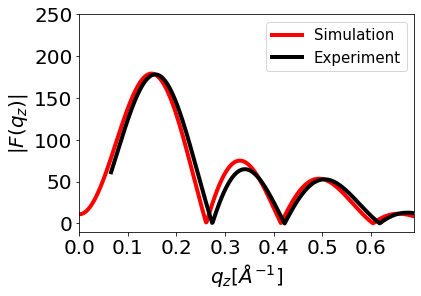

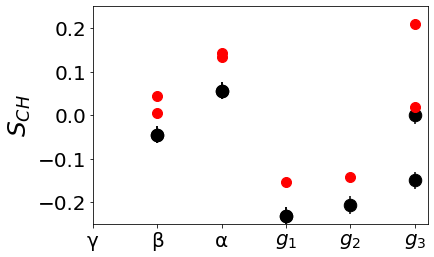

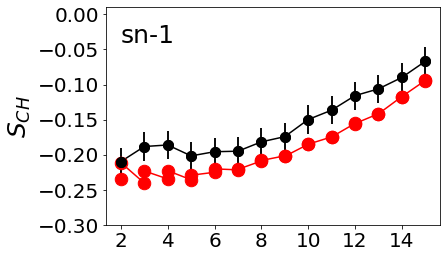

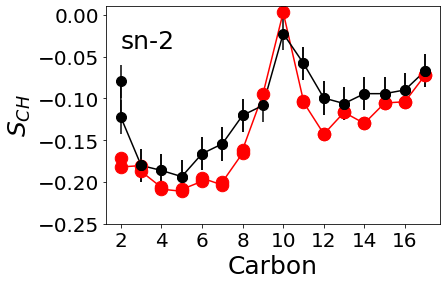

In [9]:
plotSimulation(202,'POPC')

# Lipid17 POPC

DOI:  10.5281/zenodo.6992065
Form factor quality:  0.14500000000000068


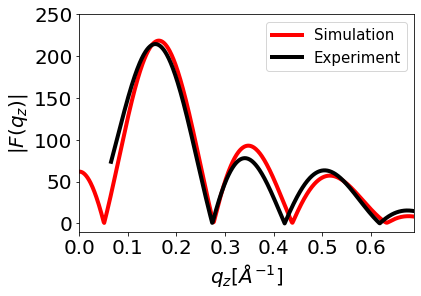

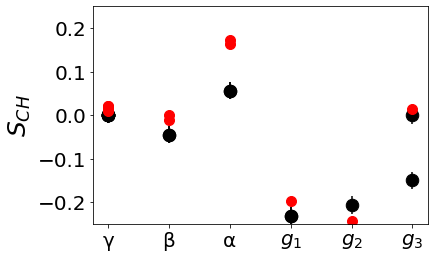

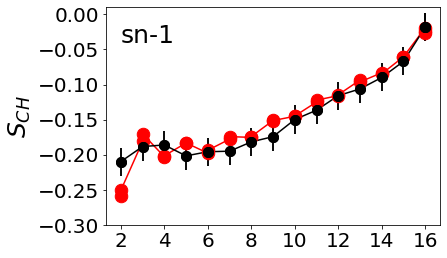

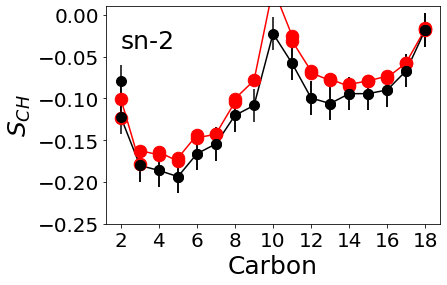

In [20]:
plotSimulation(639,'POPC')

# Slipids POPE

In [24]:
plotSimulation(414,'POPE')

DOI:  10.5281/zenodo.6992065
Form factor quality:  0.07420000000000204


FileNotFoundError: [Errno 2] No such file or directory: '../../Databank/Data/../../Databank/Data/Simulations/b97/be6/b97be660f8dbcc6b78c46a6494eb79efffdbffd7/0d4ae597205b534d766edb805ebf3047218b3432/POPEOrderParameters.json'

In [13]:
for simulation in systems:
    Nlipids = 0
    Nsol = 0
    for mol in simulation['COMPOSITION']:
        if mol in lipids_dict:
            Nlipids += np.sum(simulation['COMPOSITION'][mol]['COUNT'])
        if mol == 'SOL':
            Nsol += simulation['COMPOSITION']['SOL']['COUNT']
    if Nsol/Nlipids < 32 and Nsol/Nlipids > 31:
        print(simulation['path'])
    

../../Databank/Data/Simulations/0ee/05e/0ee05e1e79df817550a61e81325640721a390b8c/9bff2a04f58c3e886cee2ee1ab30c056d1fc9393/
../../Databank/Data/Simulations/7cf/9df/7cf9df0cc6fe319d93e3f5635b2c6b517513cbf5/b1e8bdfc572caaf640f503bff2726ed0a1a793a3/
../../Databank/Data/Simulations/c51/b34/c51b34a37b0fc7a4b522441a10112b28411f80a4/38058dc73d22c28252a892fb9caced8f2220b4bf/
../../Databank/Data/Simulations/63a/215/63a2158628d2c47aac330925d8b03b4a198407ee/6e1aef9b26dba4caff8ead7e2e691bc90fe97e68/
../../Databank/Data/Simulations/644/21f/64421fbc8aeb62548340c7ca21ac1394671989d7/09092816adf24c4a20d1598888312f7f794e31dd/
../../Databank/Data/Simulations/6c3/ca7/6c3ca7e1ad7705f7acf41f8d4165af31327259f9/77d781e4e8b5f51c484e44cd7b6022f7794bf02d/
../../Databank/Data/Simulations/225/02e/22502e7ac9fc0c6b000bbaf11c853b15aea4da61/71e868c8cfd294df5b3678d9ce7401621825d218/
../../Databank/Data/Simulations/9b7/641/9b764160ba3d106354f828531981eef8b34e8306/262e4fd83c0f60c7de432db3961400e314457a12/
../../Databank/D

DOI:  10.5281/zenodo.7061800
Form factor quality:  0.4661000000000026


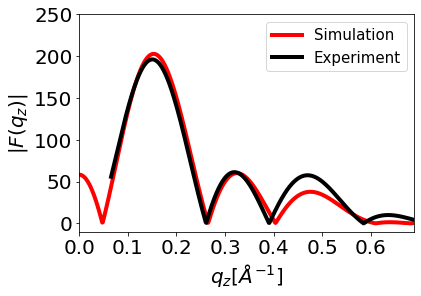

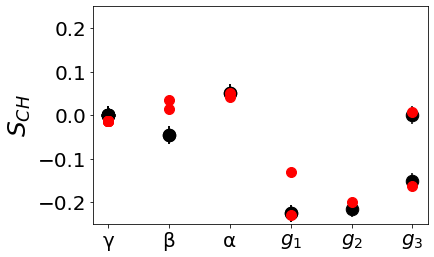

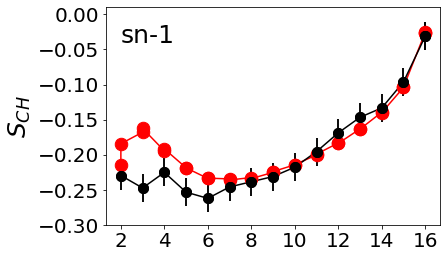

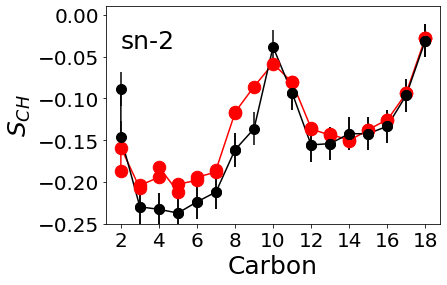

In [35]:
plotSimulation(660,'POPC')

In [17]:
for system in systems:
    if system['ID'] > 654:
        try:
            Npopc = sum(system['COMPOSITION']['POPC']['COUNT'])
            Nchol = sum(system['COMPOSITION']['CHOL']['COUNT'])
            print(Nchol/(Npopc+Nchol))
            print(system)
            print()
        except:
            pass

0.28888888888888886
{'DOI': '10.5281/zenodo.7061800', 'SOFTWARE': 'gromacs', 'TRJ': [['CHOL13_medium.xtc']], 'TPR': [['CHOL13_medium.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 100, 'COMPOSITION': {'POPC': {'NAME': 'POPC', 'MAPPING': 'mappingPOPCmacrogFUCHS.yaml', 'COUNT': [128, 128]}, 'SOL': {'NAME': 'SOL', 'MAPPING': 'mappingTIP3Pwater.yaml', 'COUNT': 18000}, 'CHOL': {'NAME': 'CHOL', 'MAPPING': 'mappingCHOLESTEROLmacrog.yaml', 'COUNT': [52, 52]}}, 'DIR_WRK': '/media/osollila/Data1/tmp/DATABANK/', 'PUBLICATION': None, 'AUTHORS_CONTACT': 'Matti Javanainen', 'SYSTEM': 'MacRog_POPC_CHOL29_M', 'SOFTWARE_VERSION': 2021, 'FF': 'MacRog', 'FF_SOURCE': None, 'FF_DATE': None, 'CPT': [['CHOL13_medium.cpt']], 'LOG': None, 'TOP': [['CHOL13_medium.top']], 'TRAJECTORY_SIZE': 356916912, 'TRJLENGTH': 1001000.0, 'TEMPERATURE': 298.15, 'NUMBER_OF_ATOMS': 96000, 'DATEOFRUNNING': '17/10/2022', 'TYPEOFSYSTEM': 'lipid bilayer', 'EXPERIMENT': {'ORDERPARAMETER': {'POPC': {}, 'CHOL': {}}, 'FORMFACTOR': {}}, 'ID': 6

DOI:  10.5281/zenodo.1488094
Form factor quality:  0.40000000000000036


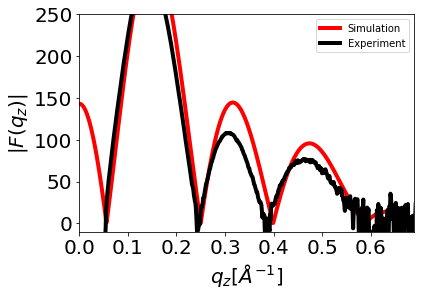

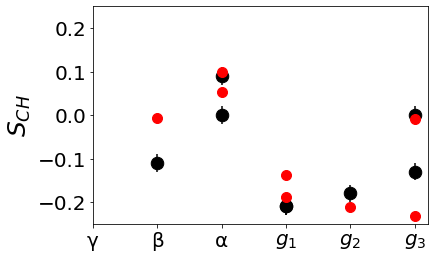

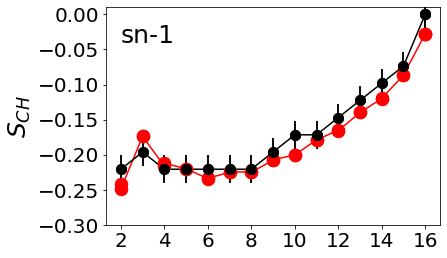

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


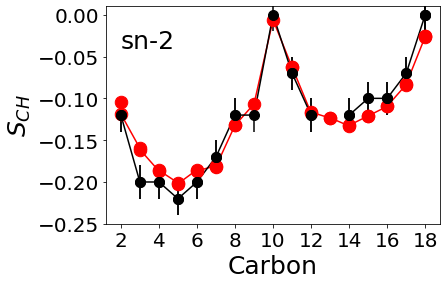

In [3]:
plotSimulation(443,'POPS')

DOI:  10.5281/zenodo.1129431
Form factor quality:  0.8000000000000007


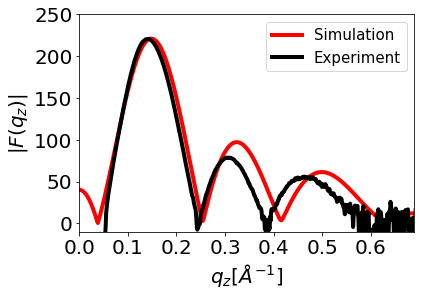

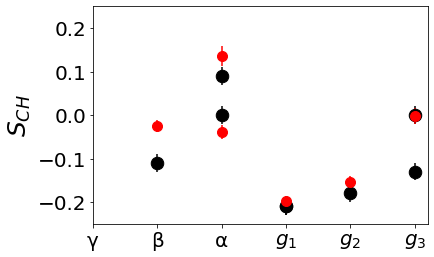

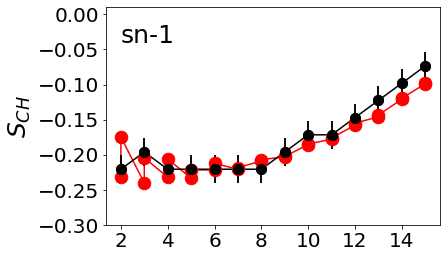

/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/osollila/.conda/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


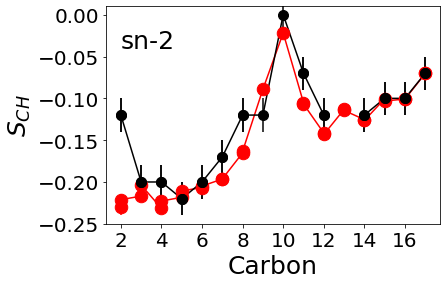

In [5]:
plotSimulation(597,'POPS')

DOI:  10.5281/zenodo.7871949
Force field quality not found
Form factor plotting failed


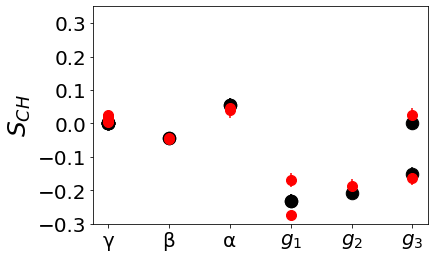

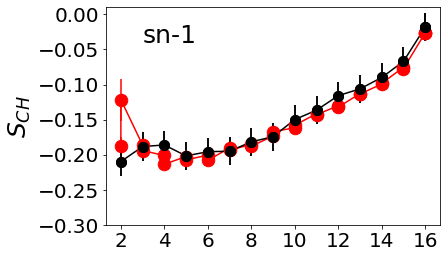

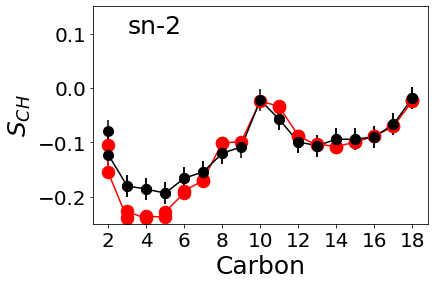

In [3]:
plotSimulation(747,'POPC')